# [Bio 1B] Bioindicators of Strawberry Creek
### Professors George Roderick, John Huelsenbeck & Alan Shabel

**Estimated Time:** _50 minutes_
<br>
**Notebook Created by:** Andy Sheu, Joshua Asuncion and Karalyn Chong
<br>
**Code Maintenance:** Elias Saravia

--- 

<img src="images/Strawberry_Creek.png" style="width: 400px;"/>

Welcome! Throughout this lab you will use Python to analyze the data that you collected from the North and South Forks of Strawberry Creek. Python is a general-purpose programming language that allows one to use data analysis methods to answer questions about data. In this part of the lab we will apply statistical methods to the biological metrics data to determine whether or not the water quality (or ecological health) of the two forks of Strawberry Creek is significantly different.

**Learning Outcomes**

By the end of this notebook and accompanying lab, students should be able to:

1. Explain the use of biological organisms as indicators of ecosystem health.
2. Interpret biological metrics of diversity: taxon richness, %EPT, biotic index (FBI), % filterers, % predators, Shannon index.
3. Understand how to contruct a Null and Alternative Hypothesis.
3. Use randomization to determine if two distributions are different.
4. Interpret a p-value to describe statistical significance.

## Table of Contents 

1. [Jupyter Notebooks](#1)
    - [Types of Cells](#1.1)
    - [Running Cells](#1.2)
    - [Editing, Saving and Submitting](#1.3)
<br/><br/>
2. [Data Recording](#2)
<br/><br/>
3. [Introduction to Data Analytics](#3)
    - [Null and Alternate Hypothesis](#3.1)
    - [Randomization Test](#3.2)
    - [P-values & Statistical Significance](#3.3)
<br/><br/>
4. [Your Data](#4)
<br/><br/>
5. [Submitting the Lab](#5)

<br>

# 1. Jupyter Notebooks <a id='1'></a>
---

This portion of the lab is set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of __cells__. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.
 
### Types of cells <a id= '1.1'> </a>

There are two types of cells in Jupyter, __code__ cells and __markdown__ cells. Code cells are cells indicated with “In [  ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell.
Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.

### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:
- press __Shift + Enter__
- click __Cell -> Run Cells__ in the toolbar at the top of the screen.

You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens. 

In [1]:
print("Hello, World")

Hello, World


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Submitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting your work into a PDF file and then including it in your Lab Report

Run this cell before proceeding with the rest of the lab!

In [2]:
from otter import Notebook

import numpy as np
import pandas as pd
from strawberry_creek_widget import *
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from IPython.display import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<br><br><br><br>

# 2. Data Recording <a id='2'> </a>
---

In this section you will import the data that you collected in the lab!

To import your data you must:
1. Download the combined class data from Google Drive and save to you computer's desktop as a .csv file with the name : strawberry_creek.csv
2. Click on the Jupyterhub icon on the top left hand corner. You will be redirected to another page where you will upload your data. 
3. In the top right hand corner, click `Upload` and select the file name `strawberry_creek.csv`. Once you upload the data, return to this notebook titled `Strawberry Creek Notebook.ipynb`.
4. In the code cell below, replace `"SC_data.csv"` with `"strawberry_creek.csv"` and your data should load.

<div class="alert alert-warning">
**Note:** If you are unable to upload the class combined data, please contact your lab instructor for the data file. As a last resort, you can let your instructor know that you will use the default data file:`"SC_data.csv"` for this notebook.
<div>

To import the data set just run the following cell!  If all goes smoothly, you will see the first few rows of your data file.

In [3]:
# data = pd.read_csv("data set name")
data = pd.read_csv("SC_data.csv")
data.head()

,Group,Fork,Richness,EPT,FBI,Filters,Predators,Shannon
0,1,North,8,32,5.52,36,6,0.9
1,2,North,7,42,5.14,36,6,0.9
2,3,North,7,40,5.28,62,2,0.4
3,4,North,6,50,5.48,65,0,0.5
4,5,North,6,30,5.18,66,0,1.0


<br>

# 3. Introduction to Data Analytics <a id= '3'> </a>
---

## Null Hypothesis vs. Alternative Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance. In this lab we are trying to determine whether or not the difference between communities of organisms in the two forks of the creek are different from one another or not. If we determine that our samples are more different than is expected by chance, then we can say that the difference is significant and conclude that our sample represent real differences in the communities of macroinvertebrates. 

To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

>__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two samples and that any difference is due to experimental error, measurement error, or chance.

>__Alternative Hypothesis__: An alternative hypothesis states that the difference in samples is meaningful, or significant.

**Example Null and Alternative Hypothesis**


Say we have a data set with samples of the number of boba shops on Southside and Northside. The data set shows that Southside has a higher average of boba shops than Northside, but it is unclear whether the difference in the average is due to chance or some other unknown reason. For this data set, potential hypotheses would be:

>__Example Null Hypothesis__
- The distribution of the average number of boba shops is the same for the samples taken from Southside as the samples taken from Northside. The difference in sample distribution is due to chance. 

>__Example Alternative Hypothesis__  
- The average number of boba shops in samples from Southside is lower than the average number of boba shops in samples from Northside.


## Discussion Questions

**Question 1a**

**What is your null hypothesis with regard to the relative water quality of the north and south fork of Strawberry Creek?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 1b**

**What is your alternative hypothesis?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

After you have your null and alternative hypothesis, the next step is to simulate the distribution under the null hypothesis! Theoretically, if the differences in distributions were solely due to random chance, then the data that the distribution originally comes from would be the same. This is where randomization tests come in to play.

<br>

## Randomization Test <a id='3.2'> </a>

A randomization test __shuffles a data set among categories and creates new distributions__. In this case, we are using a randomization test to shuffle the difference in ecological health of the two creeks. As was previously mentioned, a randomization test simulates the null hypothesis because it assumes that there is no significant difference between the distributions. 

To demonstrate, we will run randomization testing on example data of a biotic index (FBI scores) collected from the North and South Fork in order to understand the process.  You will analyze your own data after this.

Run the following code below to enter the example data and see it displayed in a data frame.

In [4]:
example = pd.DataFrame({
    'FBI Score':[3.5, 4.0, 3.0, 3.5, 4.2, 4.5, 5.0, 3.6, 4.9, 5.1, 3.4, 2.9],
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
example

,FBI Score,Fork
0,3.5,North
1,4.0,North
2,3.0,North
3,3.5,North
4,4.2,North
5,4.5,South
6,5.0,South
7,3.6,South
8,4.9,South
9,5.1,South


Here, we see each row of the dataset represents an `FBI Score` for a specific `Fork`, either North or South.

With the data, we can compare the North and South Fork by calculating the difference between the means of each Fork. Run the cell below to see the observed difference in FBI means between the two samples.

In [5]:
observed_difference = abs(example[example['Fork']=='North'].mean() - example[example['Fork']=='South'].mean())
observed_difference

FBI Score    0.56
dtype: float64

We call this our observed difference because this statistic is observed from data that was actually collected.

To illustrate how we find the observed difference, we can plot the distribution of FBI scores for each Fork. For each distribution, we plot its mean. Notice that subtracting the two means results in our observed difference from above.

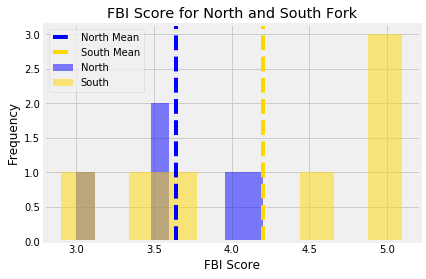

In [6]:
plt.hist(example[example['Fork'] == 'North']['FBI Score'], color='blue', alpha=0.5, label='North')
plt.hist(example[example['Fork'] == 'South']['FBI Score'], color='gold', alpha=0.5, label='South')
plt.axvline(example[example['Fork'] == 'North']['FBI Score'].mean(), color='blue', linestyle='--', label='North Mean')
plt.axvline(example[example['Fork'] == 'South']['FBI Score'].mean(), color='gold', linestyle='--', label='South Mean')
plt.xlabel('FBI Score')
plt.ylabel('Frequency')
plt.title('FBI Score for North and South Fork')
plt.legend();

In randomization testing, the data points are 'shuffled' between the two forks. That is, the analysis takes data from the North Fork and the South Fork and creates a new data set by placing the data into new North and South Fork data sets __randomly__. In this way we can test how likely it is to obtain the observed differences between the North and South fork by chance alone. 

For one randomization, we will calculate the FBI Score means for each fork. In this case, the mean difference is no longer an observed difference but a simulated difference. Run the cells below to generate a randomization of the data and to calculate the new difference.

In [7]:
perm_example = pd.DataFrame({
    'FBI Score':example['FBI Score'].sample(len(example['FBI Score'])),
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
perm_example

,FBI Score,Fork
6,5.0,North
4,4.2,North
10,3.4,North
7,3.6,North
3,3.5,North
1,4.0,South
8,4.9,South
2,3.0,South
5,4.5,South
0,3.5,South


In [8]:
perm_difference = abs(perm_example[perm_example['Fork']=='North'].mean() - perm_example[perm_example['Fork']=='South'].mean())
perm_difference

FBI Score    0.045714
dtype: float64

This is just for one randomization of the data. We perform many randomization tests (about 1000 of them) and with these values we can plot the distribution of differences of means. Using this distribution of simulated differences, we can compare it with our actual observed difference to see how likely it is to observe this difference and if our null hypothesis is true.

In [9]:
def difference_in_means(pd_series):
    return abs(pd_series['North'].mean() - pd_series['South'].mean())

n_repeats = 1000
permutation_differences = np.array([])
for i in range(n_repeats):
    permutation = pd.Series(
        np.array(example['FBI Score'].sample(len(example['FBI Score']))),
        index=np.array(example['Fork'])
    )
    new_difference = np.array(difference_in_means(permutation))
    permutation_differences = np.append(permutation_differences, new_difference)

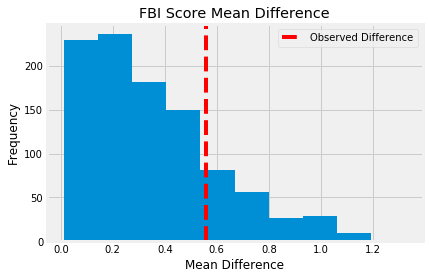

In [10]:
plt.hist(permutation_differences)
plt.axvline(observed_difference[0], color='red', linestyle='--', label='Observed Difference')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('FBI Score Mean Difference')
plt.legend();

This chart shows a distribution of differences (e.g. mean of north fork samples - mean of south fork samples) for 1000 randomized simulations. We can see that most often the difference between the means are below 0.6. The mean from the observed data is indicated by the dashed red line.

Using this plot, we can guess if the null hypothesis is true (the observed difference between the two forks is due to random chance) or if the alternative hypothesis is true (that it is not due to chance alone).



## Discussion Question

**Question 2**

**For the FBI metric, how likely is it for the observed difference to occur, and can we reject the null hypothesis?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br><br>

## P-Values & Statistical Significance <a id='3.3'> </a>

Now that we have a distribution of what the differences in FBI Scores generally look like, we can calculate the p-value to determine how probable it is for the observed_difference to occur. To calculate the p-value we count the number of times the difference is more extreme than the observed difference in the distribution and divide it by the total number of randomizations.

In [11]:
p_val_count = sum(i > observed_difference[0]for i in permutation_differences)/len(permutation_differences)
p_val_count

0.194

If the p-value is small, it indicates that it is very unlikely for this result to occur and we say we “reject the null hypothesis”, meaning that the observed data likely represent an actual difference between the North and South Fork samples. Otherwise, if the p-value is large, it implies that the observed test statistic has a high likelihood of occurring and we say we “fail to reject the null hypothesis”. 

A conventional cut-off for p-values is 0.05 or 5%. If the p-value is **less than or equal to 5%**, then the p-value is deemed **“statistically significant”**. Here, the p-value is larger than that. We will discuss p-values more in lab.


## Discussion Question

**Question 3**

**Using the calculated p-value above, do we reject the null hypothesis or fail to reject the null hypothesis? Why?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br>

# 4. Your Data<a id='4'> </a>
---

Now, instead of using example data, you will use the data you imported and calculate the mean differences for each of the metrics you measured. Run the next cell for the observed differences between forks for each of the biological measures.

In [12]:
observed_difference = abs(data[data['Fork']=='North'].mean() - data[data['Fork']=='South'].mean())
observed_difference

Group         0.000
Richness      1.000
EPT          12.300
FBI           1.944
Filters      21.300
Predators    37.700
Shannon       0.495
dtype: float64

Let's start with the FBI index.  The next few cells run the randomizations, graph the data, and calculate a p-value, just like for the sample data above.

In [13]:
def difference_in_means(pd_series):
    return abs(pd_series['North'].mean() - pd_series['South'].mean())

n_repeats = 1000
permutation_differences = np.array([])
for i in range(n_repeats):
    permutation = pd.Series(
        np.array(data['FBI'].sample(len(data['FBI']))),
        index=np.array(data['Fork'])
    )
    new_difference = np.array(difference_in_means(permutation))
    permutation_differences = np.append(permutation_differences, new_difference)

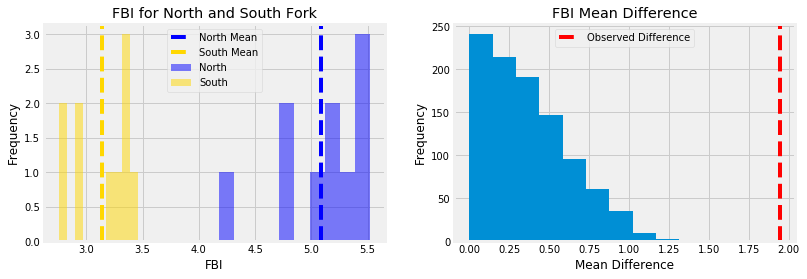

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(data[data['Fork'] == 'North']['FBI'], color='blue', alpha=0.5, label='North')
plt.hist(data[data['Fork'] == 'South']['FBI'], color='gold', alpha=0.5, label='South')
plt.axvline(data[data['Fork'] == 'North']['FBI'].mean(), color='blue', linestyle='--', label='North Mean')
plt.axvline(data[data['Fork'] == 'South']['FBI'].mean(), color='gold', linestyle='--', label='South Mean')
plt.xlabel('FBI')
plt.ylabel('Frequency')
plt.title('FBI for North and South Fork')
plt.legend()

plt.subplot(122)
plt.hist(permutation_differences)
plt.axvline(observed_difference['FBI'], color='red', linestyle='--', label='Observed Difference')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('FBI Mean Difference')
plt.legend();

In [15]:
p_val_count = sum(i > observed_difference['FBI'] for i in permutation_differences)/len(permutation_differences)
p_val_count

0.0

Now, it is easy to repeat the same analysis for each of the other biological measures you collected in the lab. One of the values of using a Notebook is that it makes repeating the same process easy. For instance, we can use a widget that takes the code and makes it interactive, so that you can select in a dropdown menu which metric you want to use.

Run the following code cell to instantiate the interactive widget. Try selecting different metrics to see how the plot changes. You will also see that on the right side, we have plotted a histogram of the metric split by the two Forks.

In [16]:
interact(mean_difference,
         data=fixed(data),
         stat=widgets.Dropdown(options=['Richness', 'EPT', 'FBI', 'Filters', 'Predators', 'Shannon'],
                               value='Richness',
                               description='Metric:',
                               disabled=False));

A Jupyter Widget


## Discussion Questions

__Question 4a__

__For each of the options in the dropdown menu (FBI Index, Richness, %ETP, %Filters, %Predators and Shannon Index), explain what the histograms mean and why the histograms look the way they do.__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 4b**

__Do you see anything unusual about any of the histograms or are they consistent with your expectations and hypotheses?__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br> 

# 5. Submitting the Lab<a id='5'> </a>
___


## Submitting your work

Run the code cell below convert your answers to the discussion question into a pdf. Be sure to follow instruction for submitting this assignment.
- After running the cell, you can click `Download it here!` to create a PDF.
- After running the cell, you can also right-click on `Download it here!` then click `Save Link As...` to save it as a PDF.

In [ ]:
# run this cell to convert your work to a pdf for submission
Notebook.export("Bioindicators Notebook.ipynb", filter_type='tags')

<br><br><br>
## Data Science Opportunities

---

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings